In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# ```Stride:``` In previous class you observed that we were scanning the image by shifting one row at a time or in downwards direction one column at a time. Then we were using stride = 1, but we can use any stride. Here I have modified our convolve function to account for stride.

In [2]:
# Function to perform convolution with stride
def convolve_stride(image, filter_pattern, stride=1):
    rows, cols = image.shape
    filter_size = filter_pattern.shape[0]
    output_rows = (rows - filter_size) // stride + 1
    output_cols = (cols - filter_size) // stride + 1
    output = np.zeros((output_rows, output_cols))
    
    for i in range(0, rows - filter_size + 1, stride):
        for j in range(0, cols - filter_size + 1, stride):
            patch = image[i:i+filter_size, j:j+filter_size]
            output[i // stride, j // stride] = np.sum(patch * filter_pattern)
    
    return output

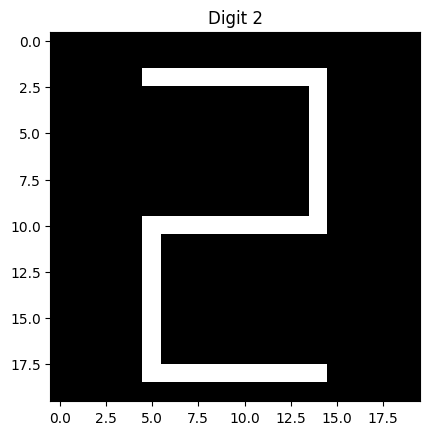

In [3]:
# Create a blank 20x20 image
image = np.zeros((20, 20))

# Draw the digit "2" on the image
# Top horizontal line
image[2, 5:15] = 1
# Middle vertical line
image[2:10, 14] = 1
# Middle horizontal line
image[10, 5:15] = 1
# Bottom vertical line
image[10:18, 5] = 1
# Bottom horizontal line
image[18, 5:15] = 1

# Plot the image
plt.imshow(image, cmap='gray')
plt.title('Digit 2')
plt.show()

In [4]:
# Define vertical edge filter
vertical_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Define horizontal edge filter
horizontal_filter = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [5]:
# Apply convolution with stride 1
vertical_edges_stride1 = convolve_stride(image, vertical_filter, stride=1)
horizontal_edges_stride1 = convolve_stride(image, horizontal_filter, stride=1)

# Apply convolution with stride 2
vertical_edges_stride2 = convolve_stride(image, vertical_filter, stride=2)
horizontal_edges_stride2 = convolve_stride(image, horizontal_filter, stride=2)

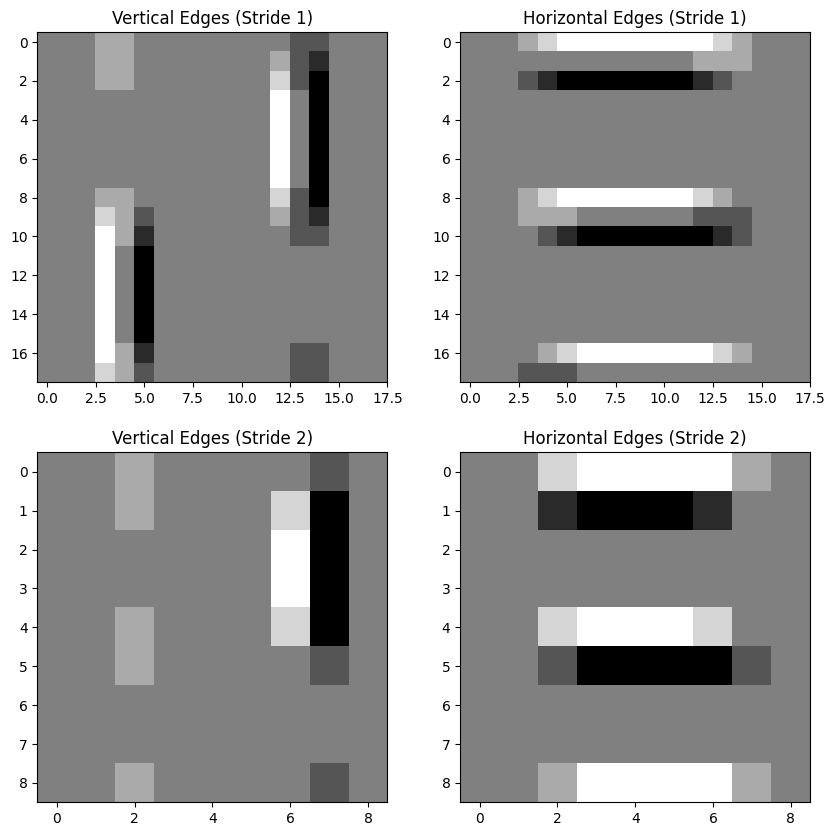

In [7]:
# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(vertical_edges_stride1, cmap='gray')
axes[0, 0].set_title('Vertical Edges (Stride 1)')
axes[0, 1].imshow(horizontal_edges_stride1, cmap='gray')
axes[0, 1].set_title('Horizontal Edges (Stride 1)')
axes[1, 0].imshow(vertical_edges_stride2, cmap='gray')
axes[1, 0].set_title('Vertical Edges (Stride 2)')
axes[1, 1].imshow(horizontal_edges_stride2, cmap='gray')
axes[1, 1].set_title('Horizontal Edges (Stride 2)')
plt.show()

# ```Conclusion:``` Stride = 1 will decrease the resolution of resultant feature map by 1 row and 1 column (i.e. n * n input image to (n - 1) * (n - 1) feature map), and so the stride more than 1 will decrese the size of resultant feature map further (try to observe by drawing sliding with hand with different strides). To preserve the size of resultant feature map we need to padd the image (add zeros on the boreder), if padding = 1, then we add add rows and columns of zeros on all the four sides. Thus we update our convolve function to account for padding.

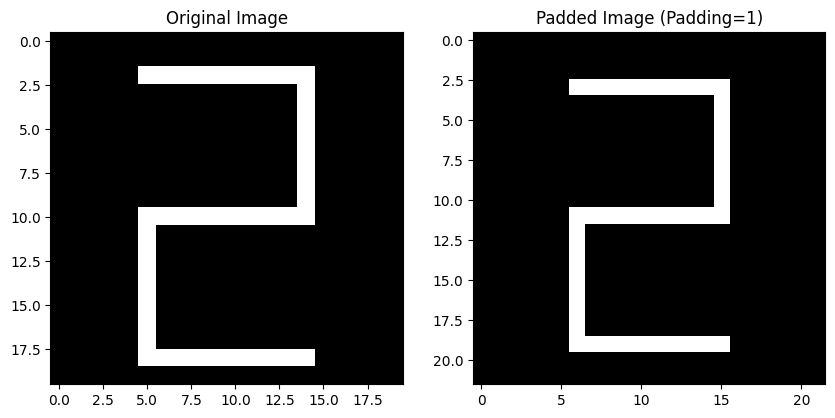

In [8]:
# Apply zero padding to the image
padding = 1
padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

# Plot the original and padded images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(padded_image, cmap='gray')
axes[1].set_title(f'Padded Image (Padding={padding})')
plt.show()

In [9]:
# Function to perform convolution with stride and padding
def convolve_stride_pad(image, filter_pattern, stride=1, padding=0):
    # Add zero padding to the input image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    rows, cols = image.shape
    filter_size = filter_pattern.shape[0]
    output_rows = (rows - filter_size) // stride + 1
    output_cols = (cols - filter_size) // stride + 1
    output = np.zeros((output_rows, output_cols))
    
    for i in range(0, rows - filter_size + 1, stride):
        for j in range(0, cols - filter_size + 1, stride):
            patch = image[i:i+filter_size, j:j+filter_size]
            output[i // stride, j // stride] = np.sum(patch * filter_pattern)
    
    return output

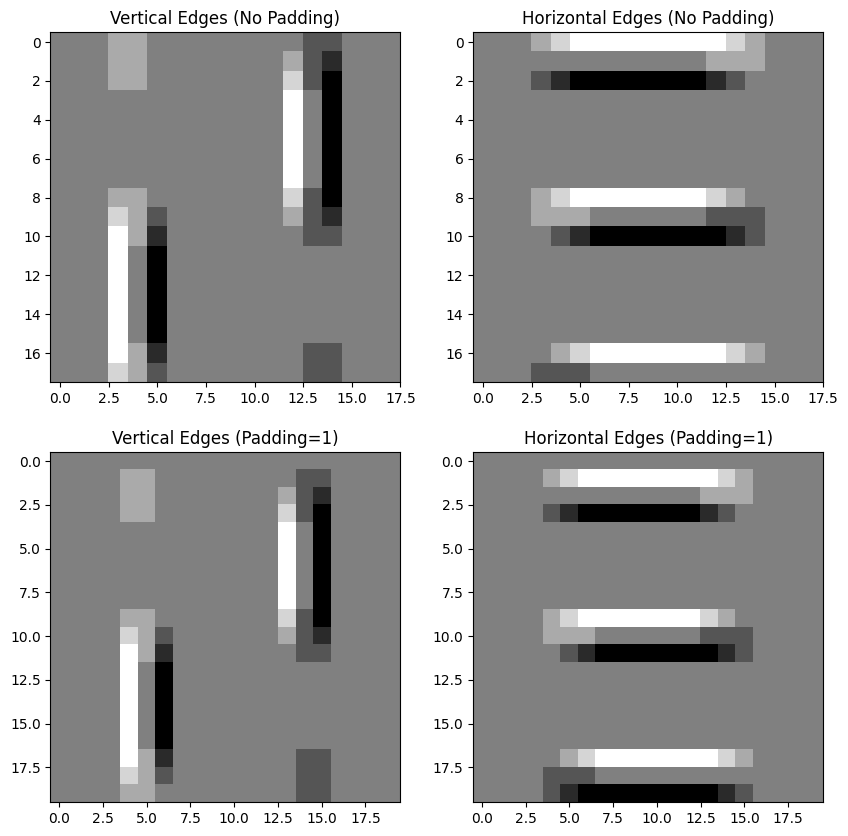

In [10]:
# Apply convolution without padding
vertical_edges_no_padding = convolve_stride_pad(image, vertical_filter, stride=1, padding=0)
horizontal_edges_no_padding = convolve_stride_pad(image, horizontal_filter, stride=1, padding=0)

# Apply convolution with padding of 1
vertical_edges_padding = convolve_stride_pad(image, vertical_filter, stride=1, padding=1)
horizontal_edges_padding = convolve_stride_pad(image, horizontal_filter, stride=1, padding=1)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(vertical_edges_no_padding, cmap='gray')
axes[0, 0].set_title('Vertical Edges (No Padding)')
axes[0, 1].imshow(horizontal_edges_no_padding, cmap='gray')
axes[0, 1].set_title('Horizontal Edges (No Padding)')
axes[1, 0].imshow(vertical_edges_padding, cmap='gray')
axes[1, 0].set_title('Vertical Edges (Padding=1)')
axes[1, 1].imshow(horizontal_edges_padding, cmap='gray')
axes[1, 1].set_title('Horizontal Edges (Padding=1)')
plt.show()

# ```Observation:``` With kernel size = 3, stride = 1, and padding = 1, we are able to preserve the original size of the image.Also the general formula for padding to preserve spatial size with stride = 1 is p = (k - 1)/2, where is k is kernel size. Notice that with stride greate than 2, it is not possible to preserve the size of feature map. 

# ```Pooling/Filltering (Max):``` During feature extraction using convolutional operation sometimes we want to make feature maps more robust to small shifts and variations in input image or say account for jitter (account for minor shifts and variations in the image itself, remember this is where we started from). To do this we apply something called pooling, it is just like a scanning neuron but with all weights = 1 and activation function as max (i.e. no linear combination, but pick the max or average from the patch at which neuron is looking at, and also no bias term). Generally we have stride same as the size of kernel in pooling operation, that's why we call pooling operation downsampling as this setup will reduce the size of feature map by k times where k is kernel size (i.e. with kernel size 2 and stride 2 the feature map will be (n/2) * (n/2) size )

In [11]:
# Function to perform max pooling with a given stride
def max_pooling(feature_map, pool_size=2, stride=2):
    rows, cols = feature_map.shape
    output_rows = (rows - pool_size) // stride + 1
    output_cols = (cols - pool_size) // stride + 1
    output = np.zeros((output_rows, output_cols))
    
    for i in range(0, rows - pool_size + 1, stride):
        for j in range(0, cols - pool_size + 1, stride):
            patch = feature_map[i:i+pool_size, j:j+pool_size]
            output[i // stride, j // stride] = np.max(patch)
    
    return output

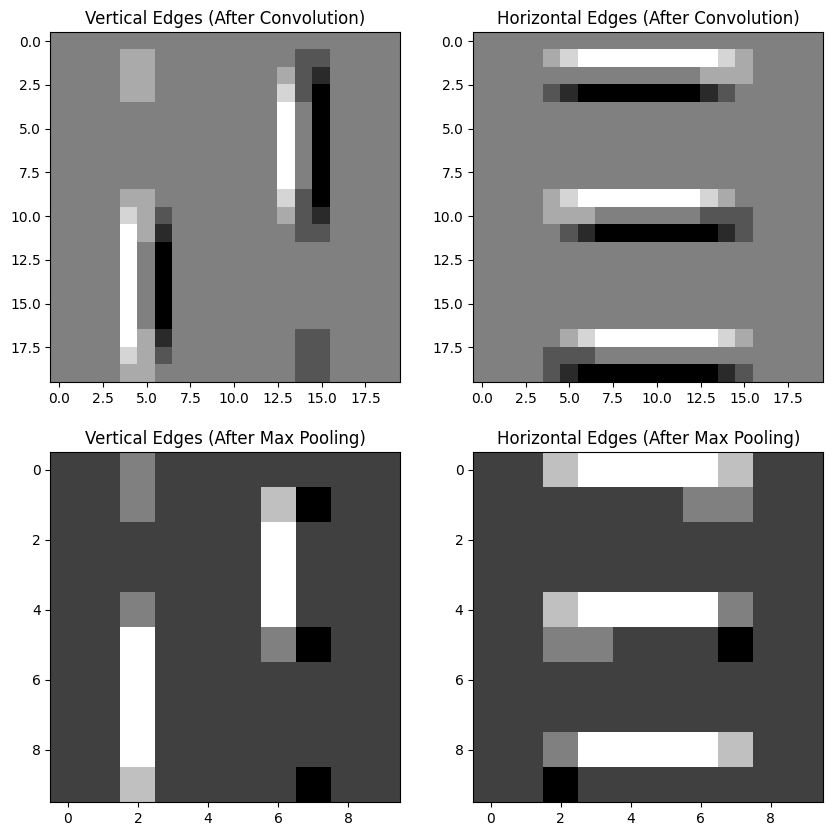

In [12]:
# Apply convolution with padding and stride 1
vertical_edges = convolve_stride_pad(image, vertical_filter, stride=1, padding=1)
horizontal_edges = convolve_stride_pad(image, horizontal_filter, stride=1, padding=1)

# Apply max pooling with pool size 2 and stride 2
vertical_edges_pooled = max_pooling(vertical_edges, pool_size=2, stride=2)
horizontal_edges_pooled = max_pooling(horizontal_edges, pool_size=2, stride=2)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(vertical_edges, cmap='gray')
axes[0, 0].set_title('Vertical Edges (After Convolution)')
axes[0, 1].imshow(horizontal_edges, cmap='gray')
axes[0, 1].set_title('Horizontal Edges (After Convolution)')
axes[1, 0].imshow(vertical_edges_pooled, cmap='gray')
axes[1, 0].set_title('Vertical Edges (After Max Pooling)')
axes[1, 1].imshow(horizontal_edges_pooled, cmap='gray')
axes[1, 1].set_title('Horizontal Edges (After Max Pooling)')
plt.show()

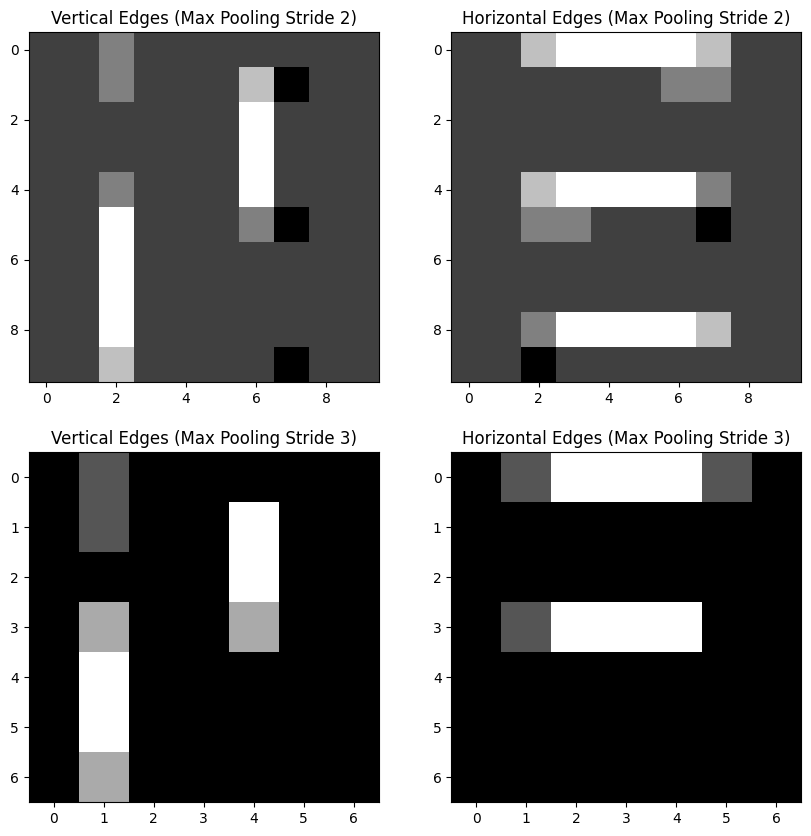

In [13]:
# Apply max pooling with pool size 2 and stride 3
vertical_edges_pooled_stride3 = max_pooling(vertical_edges, pool_size=2, stride=3)
horizontal_edges_pooled_stride3 = max_pooling(horizontal_edges, pool_size=2, stride=3)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(vertical_edges_pooled, cmap='gray')
axes[0, 0].set_title('Vertical Edges (Max Pooling Stride 2)')
axes[0, 1].imshow(horizontal_edges_pooled, cmap='gray')
axes[0, 1].set_title('Horizontal Edges (Max Pooling Stride 2)')
axes[1, 0].imshow(vertical_edges_pooled_stride3, cmap='gray')
axes[1, 0].set_title('Vertical Edges (Max Pooling Stride 3)')
axes[1, 1].imshow(horizontal_edges_pooled_stride3, cmap='gray')
axes[1, 1].set_title('Horizontal Edges (Max Pooling Stride 3)')
plt.show()

In [14]:
vertical_edges_pooled.shape, vertical_edges_pooled_stride3.shape

((10, 10), (7, 7))

# ```Observation:``` With stride 2 and kernel size 2, the dominant features are more pronounced in the feature map and also the feature map has size 10 * 10 (input size was 20 * 20). But with stride = 3, we have lost some important information in horizontal feature map. Let's look at pooling with a noisy image:

In [15]:
# Function to add noise to the image
def add_noise(image, noise_level=0.1):
    noisy_image = image + noise_level * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)  # Ensure pixel values are in [0, 1]
    return noisy_image

# Create a blank 20x20 image and draw the digit "2" on it
image = np.zeros((20, 20))
image[2, 5:15] = 1
image[2:10, 14] = 1
image[10, 5:15] = 1
image[10:18, 5] = 1
image[18, 5:15] = 1

# Add noise to the image
noise_level = 0.3
noisy_image = add_noise(image, noise_level=noise_level)

In [16]:
# Define vertical and horizontal edge filters
vertical_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

horizontal_filter = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [17]:
# Apply convolution with padding and stride 1
vertical_edges_noisy = convolve_stride_pad(noisy_image, vertical_filter, stride=1, padding=1)
horizontal_edges_noisy = convolve_stride_pad(noisy_image, horizontal_filter, stride=1, padding=1)

In [18]:
# Apply pooling to the resultant feature maps
vertical_edges_pooled_noisy = max_pooling(vertical_edges_noisy, pool_size=2, stride=2)
horizontal_edges_pooled_noisy = max_pooling(horizontal_edges_noisy, pool_size=2, stride=2)

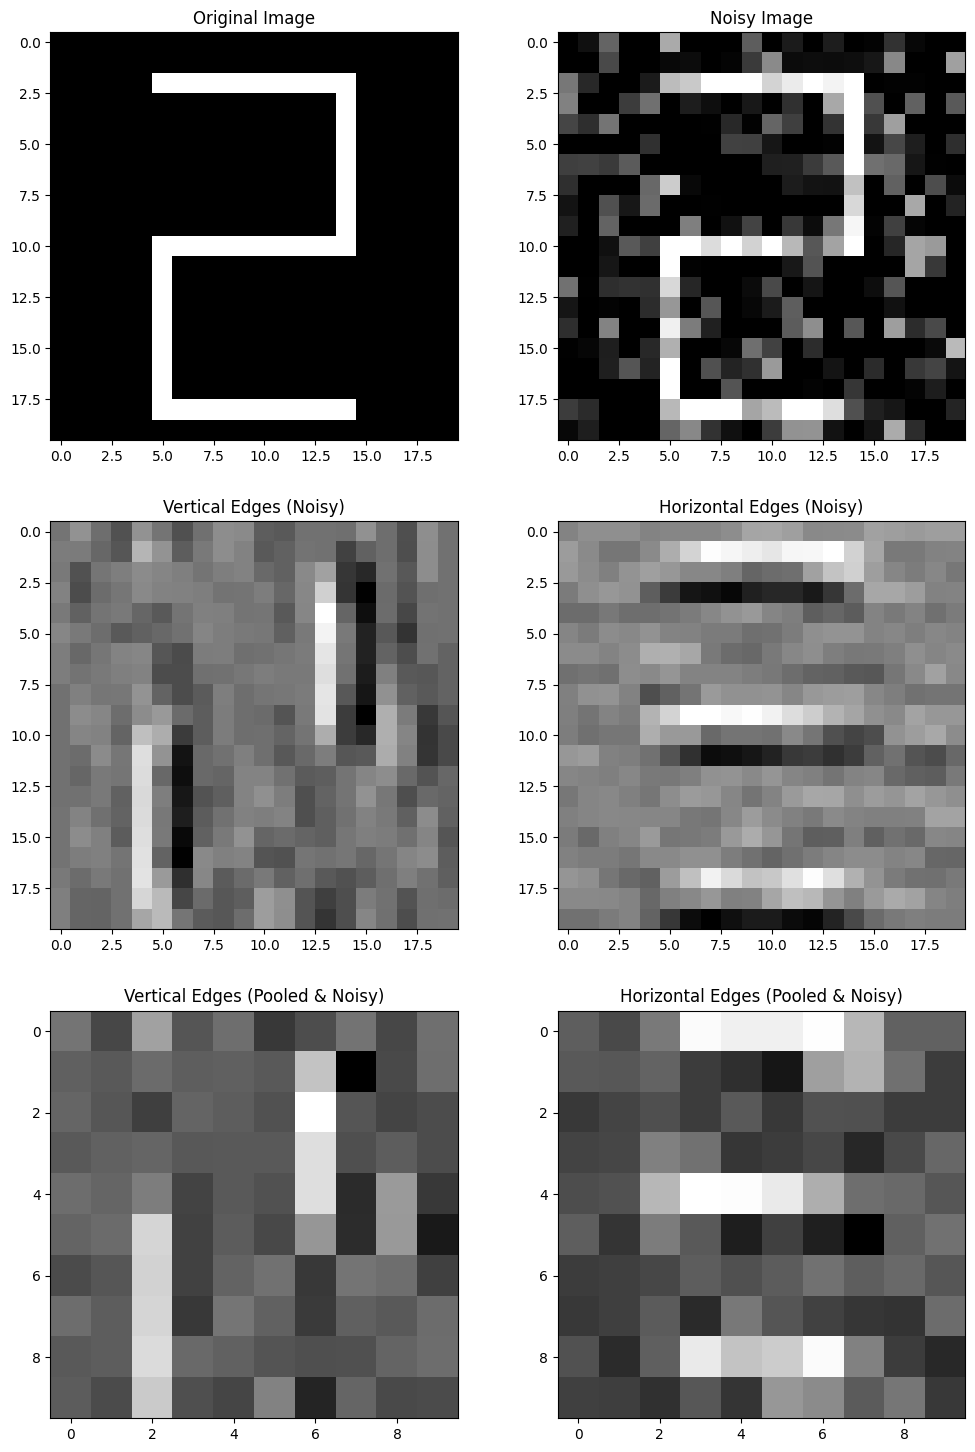

In [19]:
# Plot the results
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(noisy_image, cmap='gray')
axes[0, 1].set_title('Noisy Image')
axes[1, 0].imshow(vertical_edges_noisy, cmap='gray')
axes[1, 0].set_title('Vertical Edges (Noisy)')
axes[1, 1].imshow(horizontal_edges_noisy, cmap='gray')
axes[1, 1].set_title('Horizontal Edges (Noisy)')
axes[2, 0].imshow(vertical_edges_pooled_noisy, cmap='gray')
axes[2, 0].set_title('Vertical Edges (Pooled & Noisy)')
axes[2, 1].imshow(horizontal_edges_pooled_noisy, cmap='gray')
axes[2, 1].set_title('Horizontal Edges (Pooled & Noisy)')
plt.show()

# ```Conclusion:``` Dominant features are more pronounced in the pooled feature maps.

In [20]:
# Create a blank 20x20 image
image = np.zeros((20, 20))

# Draw a smaller digit "2" shifted towards the top-left corner
# Top horizontal line
image[1, 2:8] = 1
# Middle vertical line
image[1:5, 7] = 1
# Middle horizontal line
image[5, 2:8] = 1
# Bottom vertical line
image[5:9, 2] = 1
# Bottom horizontal line
image[9, 2:8] = 1

# Define vertical and horizontal edge filters
vertical_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

horizontal_filter = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [21]:
# Function to perform convolution with stride and padding
def convolve(image, filter_pattern, stride=1, padding=0):
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    rows, cols = image.shape
    filter_size = filter_pattern.shape[0]
    output_rows = (rows - filter_size) // stride + 1
    output_cols = (cols - filter_size) // stride + 1
    output = np.zeros((output_rows, output_cols))
    
    for i in range(0, rows - filter_size + 1, stride):
        for j in range(0, cols - filter_size + 1, stride):
            patch = image[i:i+filter_size, j:j+filter_size]
            output[i // stride, j // stride] = np.sum(patch * filter_pattern)
    
    return output

# Function to perform max pooling
def max_pooling(feature_map, pool_size=2, stride=2):
    rows, cols = feature_map.shape
    output_rows = (rows - pool_size) // stride + 1
    output_cols = (cols - pool_size) // stride + 1
    output = np.zeros((output_rows, output_cols))
    
    for i in range(0, rows - pool_size + 1, stride):
        for j in range(0, cols - pool_size + 1, stride):
            patch = feature_map[i:i+pool_size, j:j+pool_size]
            output[i // stride, j // stride] = np.max(patch)
    
    return output

In [22]:
# Apply first convolution with padding and stride 1
vertical_edges = convolve(image, vertical_filter, stride=1, padding=1)
horizontal_edges = convolve(image, horizontal_filter, stride=1, padding=1)

# Define a final filter to combine the vertical and horizontal feature maps
final_filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# Combine feature maps using the final filter
combined_feature_map = convolve(vertical_edges + horizontal_edges, final_filter, stride=1, padding=1)

# Apply max pooling to the final feature map
pooled_feature_map = max_pooling(combined_feature_map, pool_size=2, stride=2)

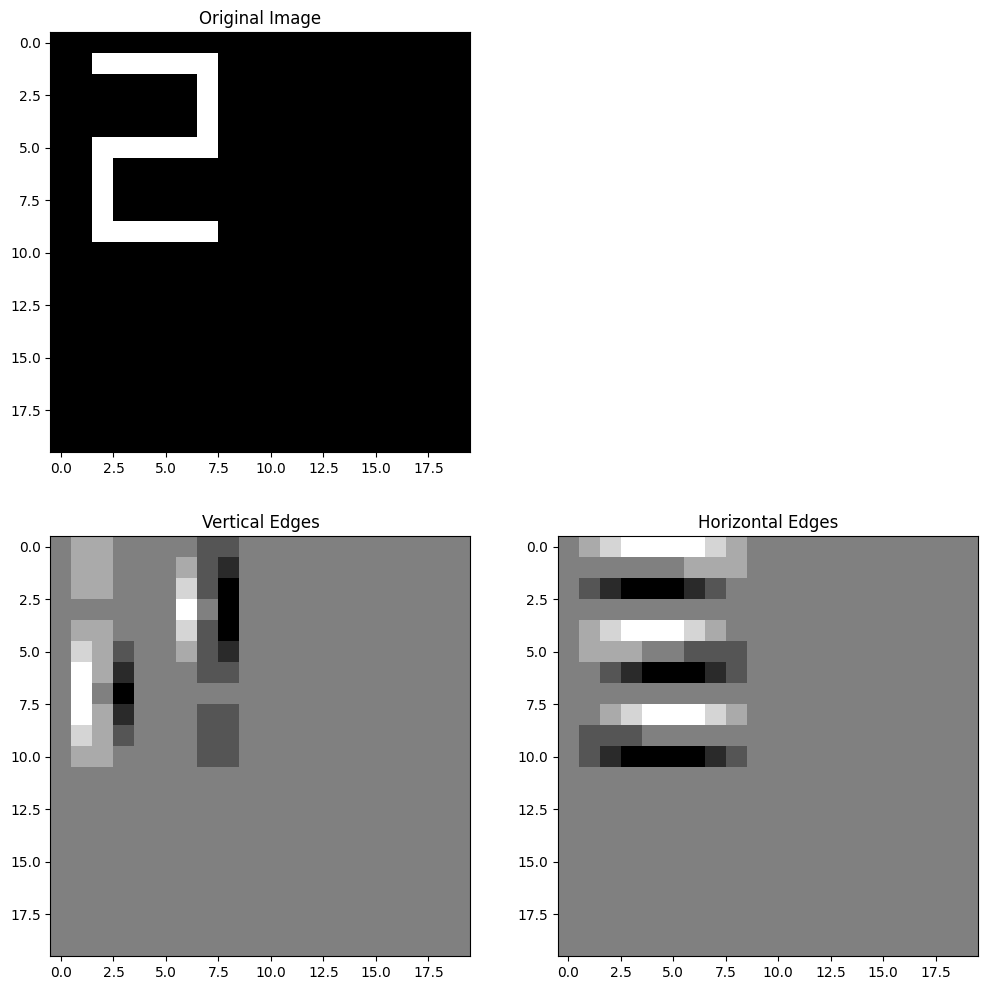

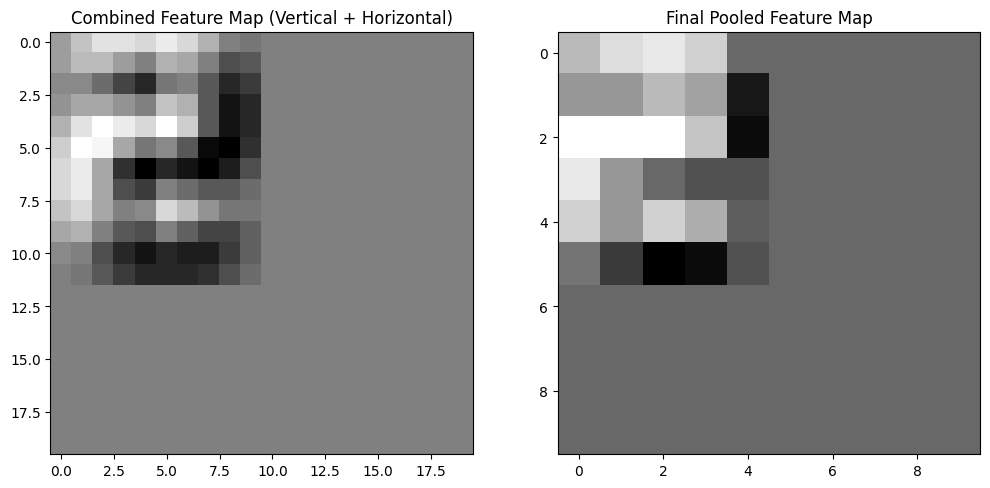

In [53]:
# Plot the original image and feature maps
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].axis('off')  # No second image in the first row

axes[1, 0].imshow(vertical_edges, cmap='gray')
axes[1, 0].set_title('Vertical Edges')
axes[1, 1].imshow(horizontal_edges, cmap='gray')
axes[1, 1].set_title('Horizontal Edges')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(combined_feature_map, cmap='gray')
axes[0].set_title('Combined Feature Map (Vertical + Horizontal)')
axes[1].imshow(pooled_feature_map, cmap='gray')
axes[1].set_title('Final Pooled Feature Map')
plt.show()

# ```Caution:``` If you observe closely till now we are two feature maps (vertical edge feature and hozrizontal edge feature) by combining then, but this is not how CNN works instead we have 3 d filter (size 2 by 3 by 3) for 3 d image (size 2 by 20 by 20). The computation remains same, it is just like scanning a bigger cuboid with a smaller cuboid (but both cuboid have same depth). The computation process remains same, elementwise multiplication and then sum. Thus, modify our convolution function to account for multichannel input:

In [23]:
# Combine vertical and horizontal edges into a two-channel feature map
combined_feature_map = np.stack((vertical_edges, horizontal_edges), axis=-1)

# Define a filter to be used for the second convolution (2 channels, 3x3)
second_filter = np.ones((2, 3, 3))

# Function to perform 2-channel convolution with stride and padding
def convolve_two_channel(image, filters, stride=1, padding=0):
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    
    rows, cols, channels = image.shape
    out_channels, filter_size, _ = filters.shape
    output_rows = (rows - filter_size) // stride + 1
    output_cols = (cols - filter_size) // stride + 1
    output = np.zeros((output_rows, output_cols))
    
    for i in range(0, rows - filter_size + 1, stride):
        for j in range(0, cols - filter_size + 1, stride):
            patch = image[i:i+filter_size, j:j+filter_size, :]
            output[i // stride, j // stride] = np.sum(patch * filters[:, :, :, np.newaxis].sum(axis=0))
    
    return output

# Apply second convolution with two channels
final_feature_map = convolve_two_channel(combined_feature_map, second_filter, stride=1, padding=1)

print(final_feature_map.shape)

(20, 20)


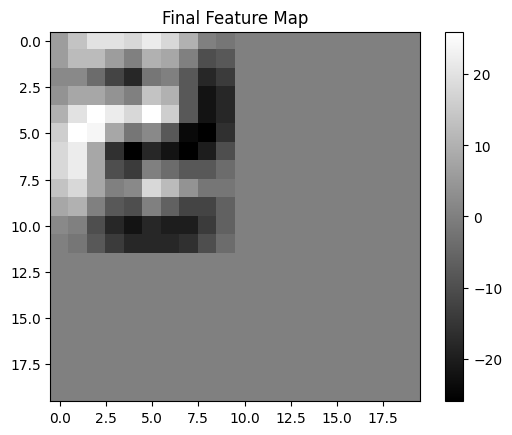

In [24]:
# Plot the final feature map
plt.imshow(final_feature_map, cmap='gray')
plt.title('Final Feature Map')
plt.colorbar()
plt.show()

# ```Note:``` You will not notice any difference between result of 'adding and convolution' and 'two channel convolution' as all the weights are 1. But during training CNN will automatically learn to assign dynamic weights to each feature map, and that's why CNN is so powerful.